# Derivatives

we want to find minimum of MSE. so derivatives of MSE should be zero

<img src="https://latex.codecogs.com/svg.latex?\nabla MSE=[\frac{\partial MSE}{\partial m}, \frac{\partial MSE}{\partial b}]"/>
<img src="https://latex.codecogs.com/svg.latex?\nabla MSE=\frac{1}{2N}\sum_{i=1}^N(y_i-(mx_i+b))^2"/>

<img src="https://latex.codecogs.com/svg.latex?\begin{cases}\frac{\partial y_i-mx_i-b}{\partial m}=-x_i\\\frac{\partial y_i-mx_i-b}{\partial b}=-1\end{cases}"/>

<img src="https://latex.codecogs.com/svg.latex?\begin{cases}\frac{\partial (y_i-mx_i-b)^2}{\partial m}=2*(y_i-mx_i-b)*(-x_i)\\\frac{\partial (y_i-mx_i-b)^2}{\partial b}=2*(y_i-mx_i-b)*(-1)\end{cases}"/>

<img src="https://latex.codecogs.com/svg.latex?\begin{cases}\frac{\partial MSE}{\partial m}=\frac{1}{N}\sum_{i=1}^N-(y_i-mx_i-b)x_i\\\frac{\partial MSE}{\partial b}=\frac{1}{N}\sum_{i=1}^N-(y_i-mx_i-b)\end{cases}"/>

<img src="https://latex.codecogs.com/svg.latex?\begin{cases}\frac{\partial MSE}{\partial m}=-\frac{1}{N}\sum_{i=1}^N(y_i-h_i)x_i\\\frac{\partial MSE}{\partial b}=-\frac{1}{N}\sum_{i=1}^N(y_i-h_i)\end{cases}"/>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generating Dataset

In [64]:
x = np.random.rand(10, 1) * 20
y = 2.358 * x - 3.121
y = y + np.random.normal(scale=3, size=y.shape)
dataset = np.hstack((x, y))

In [65]:
X = dataset[:, 0]
y = dataset[:, 1]

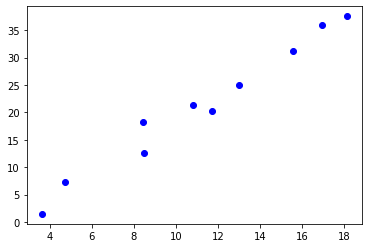

In [66]:
plt.plot(X, y, 'bo')

# Building Linear Regression Object

In [6]:
class Linear_Regression:
    def __init__(self):
        self.m = 0
        self.b = 0
        
    def __call__(self, x):
        return self.m * x + self.b
    
    def get_MSE_error(self, x, y):
        h = self(x)
        return np.mean((y - h) ** 2) / 2
    
    def get_MSE_derivatives(self, x, y):
        h = self(x)
        return -np.mean((y - h) * x), -np.mean(y - h)
    
    def fit(self, x, y, alpha, itterations):
        for i in range(itterations):
            der_m, der_b = self.get_MSE_derivatives(x, y)
            self.m = self.m - alpha * der_m
            self.b = self.b - alpha * der_b

In [7]:
model = Linear_Regression()
model.fit(X, y, 0.01, 100)

print('y = {} * x + {}'.format(model.m, model.b))

y = 2.163960993961336 * x + -0.4538488819448883


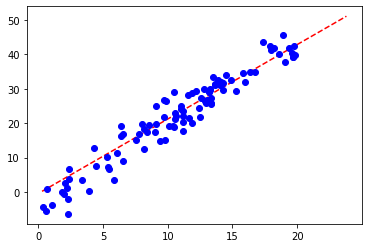

In [8]:
x_line = np.array([dataset[:, 0].min() * 0.8, dataset[:, 0].max() * 1.2])
y_line = model.m * x_line + model.b

plt.plot(x_line, y_line, 'r--')
plt.plot(X, y, 'bo')